In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.style as style
import seaborn as sns


import spacy
from spacy import displacy
import string
import regex as re

/var/folders/pc/skjhh69x6c365spmwqcs6p9h0000gn/T/ipykernel_27840/1124173725.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [3]:
cleaned_capes = pd.read_csv('cleaned_capes_data.csv')

In [4]:
cleaned_capes = cleaned_capes[(cleaned_capes['Department'] != "ANPR") & (cleaned_capes['Year'] != 2023) & (cleaned_capes['Year'] >= 2010)]
cleaned_capes

,Unnamed: 0,Instructor,Department,Course,Quarter,Year,Percentage_Responded,Total_Enrolled,Total_Response,Percentage_Recommended_Class,Percentage_Recommended_Professor,Study_Hours_per_Week,Average_Grade_Received,Average_Grade_Received_missing
2643,2660,Butler Elizabeth Annette,AAS,AAS 10,FA,2022,28.99,69,20,70.0,75.0,3.70,3.80,False
2644,2661,Butler Elizabeth Annette,AAS,AAS 170,FA,2022,29.03,31,9,88.9,88.9,3.61,3.68,False
2645,2662,Fortier Jana,ANAR,ANAR 100,FA,2022,15.00,20,3,100.0,100.0,3.17,3.30,False
2646,2663,Smith Neil Gordon,ANAR,ANAR 104,FA,2022,25.00,16,4,100.0,100.0,4.00,3.79,True
2647,2664,Jones Ian William Nasser,ANAR,ANAR 120,FA,2022,18.75,16,3,100.0,100.0,6.50,3.46,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54188,55097,Hendrickson Laura M.,VIS,VIS 22,WI,2010,36.59,164,60,66.7,23.3,3.73,3.49,False
54189,55098,Greenstein Jack M,VIS,VIS 23,WI,2010,58.82,17,10,60.0,100.0,3.30,3.29,True
54190,55099,Stalbaum Brett,VIS,VIS 40,WI,2010,34.31,102,35,65.7,82.9,4.56,3.57,False
54191,55100,Anderson Shane Nicholas,VIS,VIS 60,WI,2010,34.41,93,32,96.9,96.9,7.06,3.11,False


In [5]:
cleaned_income = pd.read_csv('fully_cleaned_income.csv')
income_df = cleaned_income
income_df

,Unnamed: 0,Year,Name,First Name,Last Name,Job Title,Income
0,12350,2010,ERNEST L III AARON,ERNEST L III,AARON,"TECHNICIAN, DEVELOPMENT, IV",65210.90
1,12351,2010,LOIS M. AARON,LOIS M.,AARON,TRANSLATOR/INTERP FOR THE DEAF,1891.54
2,12352,2010,GREGORY A. AARONS,GREGORY A.,AARONS,ASSOCIATE PROF IN RES-HCOMP,170724.59
3,12353,2010,CHARLES O ABAD,CHARLES O,ABAD,"TECHNICIAN,PATIENT DIALYSI, I",45102.64
4,12354,2010,CONCEPCION ABUTI ABAD,CONCEPCION ABUTI,ABAD,"CLERK, SR/SECRETARY",29320.17
...,...,...,...,...,...,...,...
362597,548579,2022,THOMAS ZUST,THOMAS,ZUST,ELECTR TCHN,68109.00
362598,548580,2022,MARGARET ZVIRZDIN,MARGARET,ZVIRZDIN,PAT RCDS ABSTRACTOR 3,94538.00
362599,548581,2022,JANE ZWERNEMAN,JANE,ZWERNEMAN,BLANK AST 3,90684.00
362600,548582,2022,MEGAN ZYNKIAN,MEGAN,ZYNKIAN,CLIN NURSE 3,117645.00


In [6]:
# Removes punctuation from a string input
def remove_punctuation(input_string):
    
    clean_punc = str(re.sub(r'[^a-zA-Z1-9\s]', '', input_string))
    
#     translator = str.maketrans("", "", string.punctuation)
#     translator = str(translator)
#     print(translator)
    
#     clean_string = input_string.translate(translator)
#     print("success")
    
    

    clean_string = clean_punc.lower()
    
    return clean_string

# Remove punctuation on both dataframe

In [7]:
cleaned_capes = cleaned_capes.assign(Instructor = cleaned_capes['Instructor'].apply(remove_punctuation))
cleaned_capes

,Unnamed: 0,Instructor,Department,Course,Quarter,Year,Percentage_Responded,Total_Enrolled,Total_Response,Percentage_Recommended_Class,Percentage_Recommended_Professor,Study_Hours_per_Week,Average_Grade_Received,Average_Grade_Received_missing
2643,2660,butler elizabeth annette,AAS,AAS 10,FA,2022,28.99,69,20,70.0,75.0,3.70,3.80,False
2644,2661,butler elizabeth annette,AAS,AAS 170,FA,2022,29.03,31,9,88.9,88.9,3.61,3.68,False
2645,2662,fortier jana,ANAR,ANAR 100,FA,2022,15.00,20,3,100.0,100.0,3.17,3.30,False
2646,2663,smith neil gordon,ANAR,ANAR 104,FA,2022,25.00,16,4,100.0,100.0,4.00,3.79,True
2647,2664,jones ian william nasser,ANAR,ANAR 120,FA,2022,18.75,16,3,100.0,100.0,6.50,3.46,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54188,55097,hendrickson laura m,VIS,VIS 22,WI,2010,36.59,164,60,66.7,23.3,3.73,3.49,False
54189,55098,greenstein jack m,VIS,VIS 23,WI,2010,58.82,17,10,60.0,100.0,3.30,3.29,True
54190,55099,stalbaum brett,VIS,VIS 40,WI,2010,34.31,102,35,65.7,82.9,4.56,3.57,False
54191,55100,anderson shane nicholas,VIS,VIS 60,WI,2010,34.41,93,32,96.9,96.9,7.06,3.11,False


In [8]:
income_df = (income_df.assign(first_name = income_df['First Name'].apply(remove_punctuation))
             .assign(last_name = income_df['Last Name'].apply(remove_punctuation)))
income_df

,Unnamed: 0,Year,Name,First Name,Last Name,Job Title,Income,first_name,last_name
0,12350,2010,ERNEST L III AARON,ERNEST L III,AARON,"TECHNICIAN, DEVELOPMENT, IV",65210.90,ernest l iii,aaron
1,12351,2010,LOIS M. AARON,LOIS M.,AARON,TRANSLATOR/INTERP FOR THE DEAF,1891.54,lois m,aaron
2,12352,2010,GREGORY A. AARONS,GREGORY A.,AARONS,ASSOCIATE PROF IN RES-HCOMP,170724.59,gregory a,aarons
3,12353,2010,CHARLES O ABAD,CHARLES O,ABAD,"TECHNICIAN,PATIENT DIALYSI, I",45102.64,charles o,abad
4,12354,2010,CONCEPCION ABUTI ABAD,CONCEPCION ABUTI,ABAD,"CLERK, SR/SECRETARY",29320.17,concepcion abuti,abad
...,...,...,...,...,...,...,...,...,...
362597,548579,2022,THOMAS ZUST,THOMAS,ZUST,ELECTR TCHN,68109.00,thomas,zust
362598,548580,2022,MARGARET ZVIRZDIN,MARGARET,ZVIRZDIN,PAT RCDS ABSTRACTOR 3,94538.00,margaret,zvirzdin
362599,548581,2022,JANE ZWERNEMAN,JANE,ZWERNEMAN,BLANK AST 3,90684.00,jane,zwerneman
362600,548582,2022,MEGAN ZYNKIAN,MEGAN,ZYNKIAN,CLIN NURSE 3,117645.00,megan,zynkian


# SPLIT CAPES INTO FIRST AND LAST NAME

In [9]:
last_name = cleaned_capes['Instructor'].str.split().str[0]
last_name

2643          butler
2644          butler
2645         fortier
2646           smith
2647           jones
            ...     
54188    hendrickson
54189     greenstein
54190       stalbaum
54191       anderson
54192          gorin
Name: Instructor, Length: 51550, dtype: object

In [9]:
first_name = cleaned_capes['Instructor'].str.split().str[1]
first_name

2643      elizabeth
2644      elizabeth
2645           jana
2646           neil
2647            ian
            ...    
54188         laura
54189          jack
54190         brett
54191         shane
54192    jeanpierre
Name: Instructor, Length: 51550, dtype: object

In [10]:
cleaned_capes = cleaned_capes.assign(last_name = last_name).assign(first_name = first_name)

In [11]:
cleaned_capes

,Unnamed: 0,Instructor,Department,Course,Quarter,Year,Percentage_Responded,Total_Enrolled,Total_Response,Percentage_Recommended_Class,Percentage_Recommended_Professor,Study_Hours_per_Week,Average_Grade_Received,Average_Grade_Received_missing,last_name,first_name
2643,2660,butler elizabeth annette,AAS,AAS 10,FA,2022,28.99,69,20,70.0,75.0,3.70,3.80,False,butler,elizabeth
2644,2661,butler elizabeth annette,AAS,AAS 170,FA,2022,29.03,31,9,88.9,88.9,3.61,3.68,False,butler,elizabeth
2645,2662,fortier jana,ANAR,ANAR 100,FA,2022,15.00,20,3,100.0,100.0,3.17,3.30,False,fortier,jana
2646,2663,smith neil gordon,ANAR,ANAR 104,FA,2022,25.00,16,4,100.0,100.0,4.00,3.79,True,smith,neil
2647,2664,jones ian william nasser,ANAR,ANAR 120,FA,2022,18.75,16,3,100.0,100.0,6.50,3.46,True,jones,ian
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54188,55097,hendrickson laura m,VIS,VIS 22,WI,2010,36.59,164,60,66.7,23.3,3.73,3.49,False,hendrickson,laura
54189,55098,greenstein jack m,VIS,VIS 23,WI,2010,58.82,17,10,60.0,100.0,3.30,3.29,True,greenstein,jack
54190,55099,stalbaum brett,VIS,VIS 40,WI,2010,34.31,102,35,65.7,82.9,4.56,3.57,False,stalbaum,brett
54191,55100,anderson shane nicholas,VIS,VIS 60,WI,2010,34.41,93,32,96.9,96.9,7.06,3.11,False,anderson,shane


# Take the first name only for income_df (drop the middle name abvreviation)

In [12]:
income_df

,Unnamed: 0,Year,Name,First Name,Last Name,Job Title,Income,first_name,last_name
0,12350,2010,ERNEST L III AARON,ERNEST L III,AARON,"TECHNICIAN, DEVELOPMENT, IV",65210.90,ernest l iii,aaron
1,12351,2010,LOIS M. AARON,LOIS M.,AARON,TRANSLATOR/INTERP FOR THE DEAF,1891.54,lois m,aaron
2,12352,2010,GREGORY A. AARONS,GREGORY A.,AARONS,ASSOCIATE PROF IN RES-HCOMP,170724.59,gregory a,aarons
3,12353,2010,CHARLES O ABAD,CHARLES O,ABAD,"TECHNICIAN,PATIENT DIALYSI, I",45102.64,charles o,abad
4,12354,2010,CONCEPCION ABUTI ABAD,CONCEPCION ABUTI,ABAD,"CLERK, SR/SECRETARY",29320.17,concepcion abuti,abad
...,...,...,...,...,...,...,...,...,...
362597,548579,2022,THOMAS ZUST,THOMAS,ZUST,ELECTR TCHN,68109.00,thomas,zust
362598,548580,2022,MARGARET ZVIRZDIN,MARGARET,ZVIRZDIN,PAT RCDS ABSTRACTOR 3,94538.00,margaret,zvirzdin
362599,548581,2022,JANE ZWERNEMAN,JANE,ZWERNEMAN,BLANK AST 3,90684.00,jane,zwerneman
362600,548582,2022,MEGAN ZYNKIAN,MEGAN,ZYNKIAN,CLIN NURSE 3,117645.00,megan,zynkian


In [13]:
first_name = income_df['first_name'].str.split().str[0]
first_name

0             ernest
1               lois
2            gregory
3            charles
4         concepcion
             ...    
362597        thomas
362598      margaret
362599          jane
362600         megan
362601         colin
Name: first_name, Length: 362602, dtype: object

In [14]:
income_df = income_df.assign(first_name = first_name)
income_df

,Unnamed: 0,Year,Name,First Name,Last Name,Job Title,Income,first_name,last_name
0,12350,2010,ERNEST L III AARON,ERNEST L III,AARON,"TECHNICIAN, DEVELOPMENT, IV",65210.90,ernest,aaron
1,12351,2010,LOIS M. AARON,LOIS M.,AARON,TRANSLATOR/INTERP FOR THE DEAF,1891.54,lois,aaron
2,12352,2010,GREGORY A. AARONS,GREGORY A.,AARONS,ASSOCIATE PROF IN RES-HCOMP,170724.59,gregory,aarons
3,12353,2010,CHARLES O ABAD,CHARLES O,ABAD,"TECHNICIAN,PATIENT DIALYSI, I",45102.64,charles,abad
4,12354,2010,CONCEPCION ABUTI ABAD,CONCEPCION ABUTI,ABAD,"CLERK, SR/SECRETARY",29320.17,concepcion,abad
...,...,...,...,...,...,...,...,...,...
362597,548579,2022,THOMAS ZUST,THOMAS,ZUST,ELECTR TCHN,68109.00,thomas,zust
362598,548580,2022,MARGARET ZVIRZDIN,MARGARET,ZVIRZDIN,PAT RCDS ABSTRACTOR 3,94538.00,margaret,zvirzdin
362599,548581,2022,JANE ZWERNEMAN,JANE,ZWERNEMAN,BLANK AST 3,90684.00,jane,zwerneman
362600,548582,2022,MEGAN ZYNKIAN,MEGAN,ZYNKIAN,CLIN NURSE 3,117645.00,megan,zynkian


# Merging!

## Before we merge, drop columns that are unnecessary

In [15]:
cleaned_capes = cleaned_capes.drop(columns = "Unnamed: 0")
cleaned_capes

,Instructor,Department,Course,Quarter,Year,Percentage_Responded,Total_Enrolled,Total_Response,Percentage_Recommended_Class,Percentage_Recommended_Professor,Study_Hours_per_Week,Average_Grade_Received,Average_Grade_Received_missing,last_name,first_name
2643,butler elizabeth annette,AAS,AAS 10,FA,2022,28.99,69,20,70.0,75.0,3.70,3.80,False,butler,elizabeth
2644,butler elizabeth annette,AAS,AAS 170,FA,2022,29.03,31,9,88.9,88.9,3.61,3.68,False,butler,elizabeth
2645,fortier jana,ANAR,ANAR 100,FA,2022,15.00,20,3,100.0,100.0,3.17,3.30,False,fortier,jana
2646,smith neil gordon,ANAR,ANAR 104,FA,2022,25.00,16,4,100.0,100.0,4.00,3.79,True,smith,neil
2647,jones ian william nasser,ANAR,ANAR 120,FA,2022,18.75,16,3,100.0,100.0,6.50,3.46,True,jones,ian
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54188,hendrickson laura m,VIS,VIS 22,WI,2010,36.59,164,60,66.7,23.3,3.73,3.49,False,hendrickson,laura
54189,greenstein jack m,VIS,VIS 23,WI,2010,58.82,17,10,60.0,100.0,3.30,3.29,True,greenstein,jack
54190,stalbaum brett,VIS,VIS 40,WI,2010,34.31,102,35,65.7,82.9,4.56,3.57,False,stalbaum,brett
54191,anderson shane nicholas,VIS,VIS 60,WI,2010,34.41,93,32,96.9,96.9,7.06,3.11,False,anderson,shane


In [16]:
income_df = income_df[["Year", "Name", "first_name", "last_name", "Job Title", "Income"]]
income_df

,Year,Name,first_name,last_name,Job Title,Income
0,2010,ERNEST L III AARON,ernest,aaron,"TECHNICIAN, DEVELOPMENT, IV",65210.90
1,2010,LOIS M. AARON,lois,aaron,TRANSLATOR/INTERP FOR THE DEAF,1891.54
2,2010,GREGORY A. AARONS,gregory,aarons,ASSOCIATE PROF IN RES-HCOMP,170724.59
3,2010,CHARLES O ABAD,charles,abad,"TECHNICIAN,PATIENT DIALYSI, I",45102.64
4,2010,CONCEPCION ABUTI ABAD,concepcion,abad,"CLERK, SR/SECRETARY",29320.17
...,...,...,...,...,...,...
362597,2022,THOMAS ZUST,thomas,zust,ELECTR TCHN,68109.00
362598,2022,MARGARET ZVIRZDIN,margaret,zvirzdin,PAT RCDS ABSTRACTOR 3,94538.00
362599,2022,JANE ZWERNEMAN,jane,zwerneman,BLANK AST 3,90684.00
362600,2022,MEGAN ZYNKIAN,megan,zynkian,CLIN NURSE 3,117645.00


In [17]:
merged_df = pd.merge(cleaned_capes, income_df, left_on=['Year', 'last_name', 'first_name'], right_on=['Year', 'last_name', 'first_name'])
merged_df.iloc[4450:4460]

,Instructor,Department,Course,Quarter,Year,Percentage_Responded,Total_Enrolled,Total_Response,Percentage_Recommended_Class,Percentage_Recommended_Professor,Study_Hours_per_Week,Average_Grade_Received,Average_Grade_Received_missing,last_name,first_name,Name,Job Title,Income
4450,hoang lily kim,LTWR,LTWR 8A,FA,2021,38.38,99,38,94.6,86.1,5.28,3.79,False,hoang,lily,LILY HOANG,ASSOC PROF-AY,100800.0
4451,bahadori mohammad yousef,MAE,MAE 101A,FA,2021,80.70,57,46,80.4,71.7,8.15,2.92,False,bahadori,mohammad,MOHAMMAD BAHADORI,LECT-AY-CONTINUING,200242.0
4452,sarkar sutanu,MAE,MAE 101A,FA,2021,86.96,23,20,100.0,100.0,7.30,2.97,False,sarkar,sutanu,SUTANU SARKAR,PROF-AY-B/E/E,343644.0
4453,chen renkun,MAE,MAE 101C,FA,2021,55.38,65,36,91.4,88.6,7.01,3.04,False,chen,renkun,RENKUN CHEN,ASSOC PROF-AY-B/E/E,232667.0
4454,poulikakos lisa voula,MAE,MAE 101C,FA,2021,91.18,68,62,93.5,96.8,5.31,3.51,False,poulikakos,lisa,LISA POULIKAKOS,ASST PROF-AY-B/E/E,185383.0
4455,sanchez antonio luis,MAE,MAE 104,FA,2021,88.89,63,56,98.2,96.4,7.61,3.25,False,sanchez,antonio,ANTONIO SANCHEZ,PROF-AY-B/E/E,247200.0
4456,bandaru prabhakar,MAE,MAE 105,FA,2021,60.29,68,41,95.1,100.0,7.28,3.28,False,bandaru,prabhakar,PRABHAKAR BANDARU,PROF-AY-B/E/E,231550.0
4457,becker janet maria,MAE,MAE 105,FA,2021,44.90,49,22,76.2,85.7,7.86,2.82,False,becker,janet,JANET BECKER,SR LECT SOE-AY,194042.0
4458,lubarda marko,MAE,MAE 107,FA,2021,54.46,101,55,72.7,89.1,8.32,3.11,False,lubarda,marko,MARKO LUBARDA,LECT PSOE-AY-B/E/E,153162.0
4459,tolley michael thomas,MAE,MAE 107,FA,2021,52.38,63,33,97.0,97.0,7.59,3.04,False,tolley,michael,MICHAEL TOLLEY,ASSOC PROF-AY-B/E/E,165814.0


In [22]:
# merged_df.to_csv('merged.csv')

# How Many Unique Instructors Per Year

In [18]:
instructor_counts = merged_df.groupby('Year')['Instructor'].nunique()

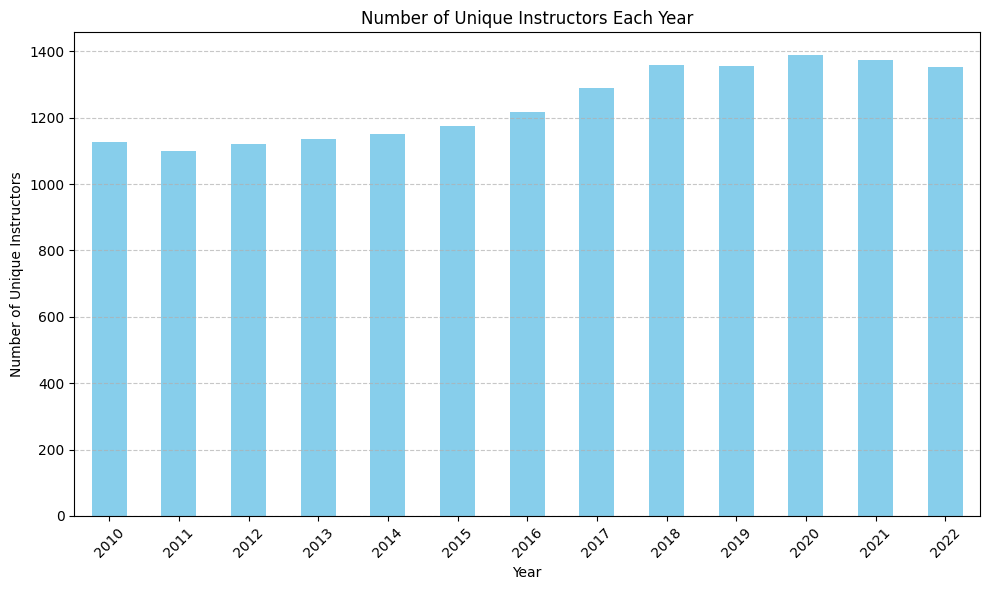

In [19]:
plt.figure(figsize=(10, 6))
instructor_counts.plot(kind='bar', color='skyblue')
plt.title('Number of Unique Instructors Each Year')
plt.xlabel('Year')
plt.ylabel('Number of Unique Instructors')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Trend of Average Income Over the Years

In [20]:
income_avg = merged_df.groupby('Year')['Income'].mean()

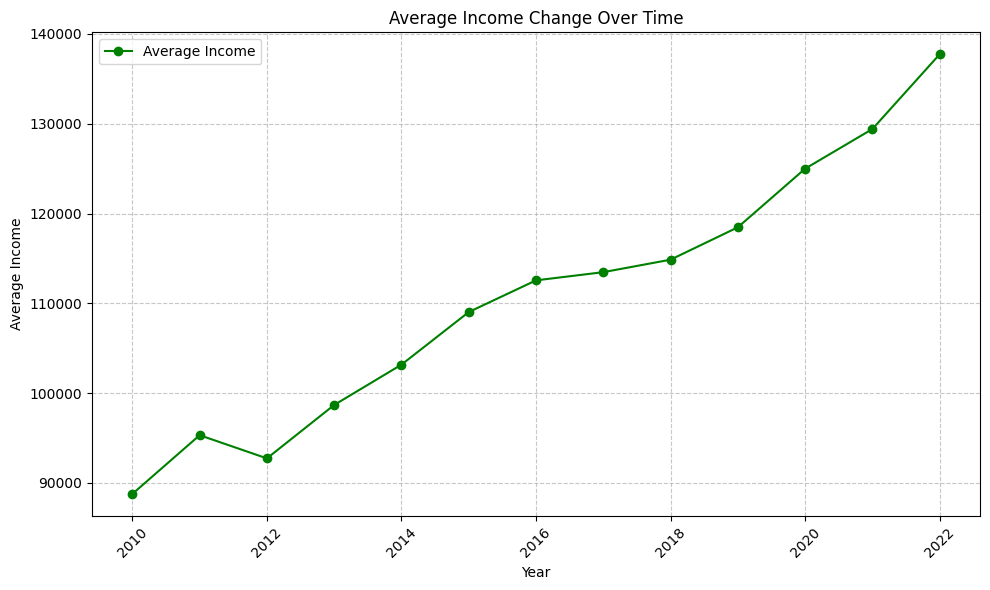

In [26]:
plt.figure(figsize=(10, 6))

# Plotting average income
income_avg.plot(kind='line', marker='o', color='green', label='Average Income')

# Labelling 
plt.title('Average Income Change Over Time')
plt.xlabel('Year')
plt.ylabel('Average Income')
plt.xticks(rotation=45)

# Grid + Legend
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()

plt.tight_layout()
plt.show()

In [27]:
merged_df.describe()

,Year,Percentage_Responded,Total_Enrolled,Total_Response,Percentage_Recommended_Class,Percentage_Recommended_Professor,Study_Hours_per_Week,Average_Grade_Received,Income
count,45105.000000,45105.000000,45105.000000,45105.000000,45105.000000,45105.000000,45105.000000,45105.000000,45105.000000
mean,2016.316861,49.477483,80.479326,39.955659,89.149141,89.464478,5.796024,3.325892,111858.452663
std,3.781171,20.162754,90.359269,50.067716,12.560181,14.403869,2.561679,0.397218,73364.244148
min,2010.000000,5.080000,3.000000,3.000000,0.000000,0.000000,0.500000,0.550000,0.000000
25%,2013.000000,35.140000,21.000000,9.000000,83.300000,84.600000,4.160000,3.040000,61694.000000
50%,2017.000000,45.160000,43.000000,19.000000,92.600000,94.700000,5.500000,3.360000,101591.640000
75%,2020.000000,60.000000,108.000000,51.000000,100.000000,100.000000,7.150000,3.660000,150000.000000
max,2022.000000,200.000000,1101.000000,588.000000,100.000000,100.000000,20.500000,4.000000,707972.000000


In [29]:
unique_quarters = merged_df['Quarter'].unique()
unique_quarters

array(['FA', 'S3', 'S2', 'S1', 'SP', 'WI', 'SU'], dtype=object)

# Average Grade of Each Quarter Per Year

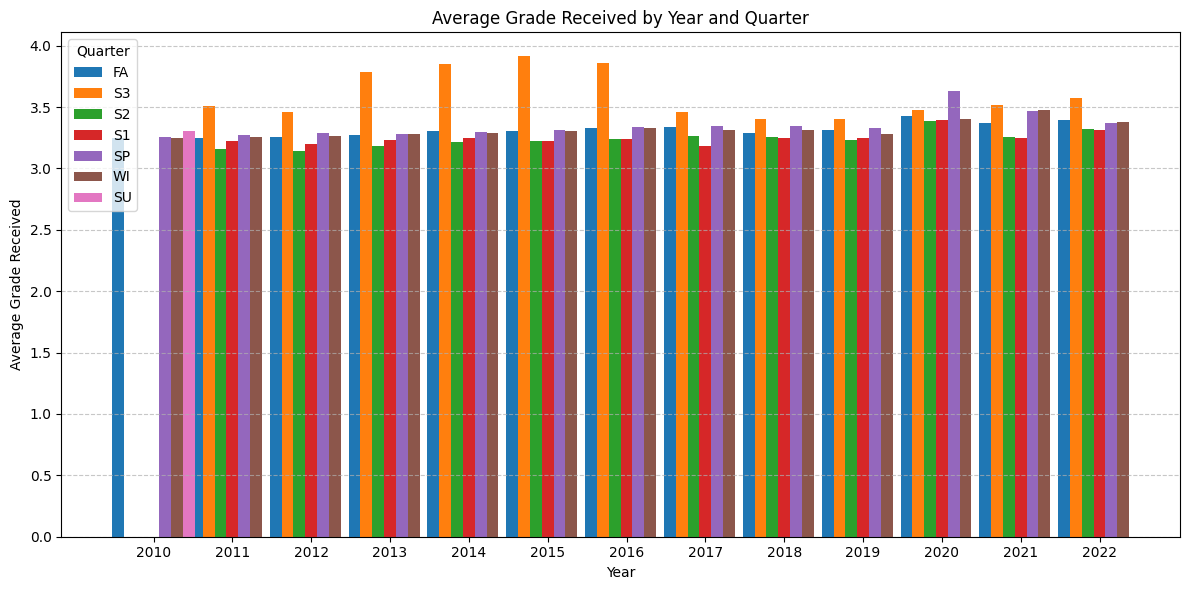

In [36]:
avg_grade_by_year_quarter = merged_df.groupby(['Year', 'Quarter'])['Average_Grade_Received'].mean().unstack()

# Get unique quarters
quarters = merged_df['Quarter'].unique()

bar_width = 0.15

plt.figure(figsize=(12, 6))

for i, quarter in enumerate(quarters):
    # x position of each bar
    x = np.arange(len(avg_grade_by_year_quarter.index)) + (bar_width * i) - (bar_width * (len(quarters) - 1) / 2)
    
    plt.bar(x, avg_grade_by_year_quarter[quarter], width=bar_width, label=quarter)

# Labelling
plt.title('Average Grade Received by Year and Quarter')
plt.xlabel('Year')
plt.ylabel('Average Grade Received')
plt.xticks(np.arange(len(avg_grade_by_year_quarter.index)), avg_grade_by_year_quarter.index)
plt.legend(title='Quarter')

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Average Grade Received Year to Year

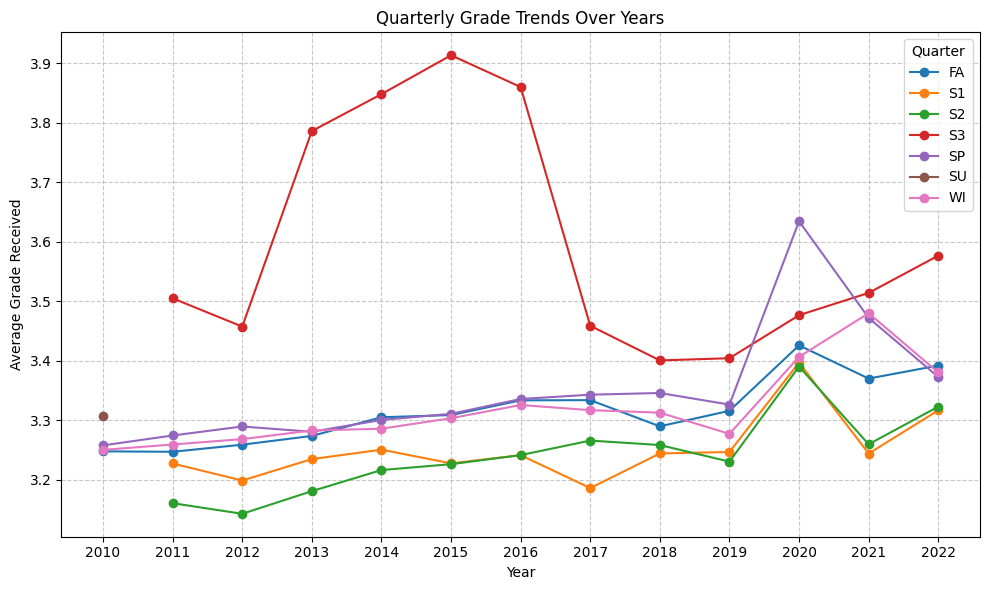

In [35]:
avg_grade_by_year_quarter = merged_df.groupby(['Year', 'Quarter'])['Average_Grade_Received'].mean().unstack()

plt.figure(figsize=(10, 6))

for quarter in avg_grade_by_year_quarter.columns:
    plt.plot(avg_grade_by_year_quarter.index, avg_grade_by_year_quarter[quarter], marker='o', label=quarter)

plt.title('Quarterly Grade Trends Over Years')
plt.xlabel('Year')
plt.ylabel('Average Grade Received')
plt.xticks(avg_grade_by_year_quarter.index)
plt.legend(title='Quarter')

plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

We can see a small increase that is fairly stable as the years go on. We see a massive spike in all quarters during the year 2020. This was during the COVID Pandemic which saw all classes go online. This explains the increase in average grade as online classes equate to more resources being open for use, and of course cheating. As classes come back to being in person in 2021 and 2022, we see the averages start to trend down but are still higher than previous years. This could be explained by the lasting effects from the COVID era with classes being hybrid, full on remote, or much more flexible as a whole.

# Correlation Matrix Between Income, Average_Grade_Received, and Year

In [38]:
correlation_matrix = merged_df[['Income', 'Average_Grade_Received', 'Year']].corr()

print("Correlation Matrix:")
print(correlation_matrix)

Correlation Matrix:
                          Income  Average_Grade_Received      Year
Income                  1.000000               -0.067069  0.192982
Average_Grade_Received -0.067069                1.000000  0.136063
Year                    0.192982                0.136063  1.000000


We calculated a correlation matrix to see if the 3 variables Income, Average_Grade_Received, and Year had any strong correlations. Since each off-diagonal value was under 0.7, there is no strong correlation between any of these variables.